In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

use random to make a simple guessing game 

https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions
https://stackoverflow.com/questions/47240308/differences-between-numpy-random-rand-vs-numpy-random-randn-in-python

## Gives a uniform distribution

np.rand gives a random number/s from a uniform distribution

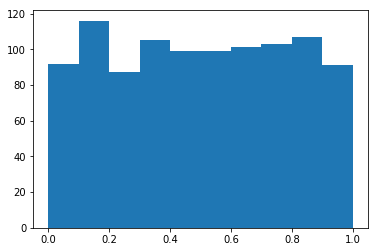

In [3]:
s = np.random.rand(1000)
plt.hist(s)
plt.show()

np.random.randn plts a random distribution

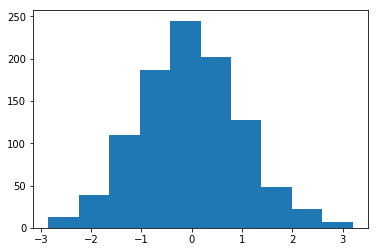

In [4]:
d = np.random.randn(1000)
plt.hist(d)
plt.show()

randint and random integers are similar, main differences; https://en.wikipedia.org/wiki/Interval_(mathematics)

The next ones are all the same https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions

Choices

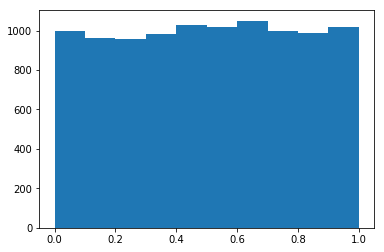

In [5]:
x = np.random.rand(10000)

plt.hist(x)
plt.show()

In [8]:
while True:
    ans = input("Guess a number between 1 and 100. Type Hard or Easy in the box")
    if ans not in ('Hard', "Easy"):
        print("Type Easy or Hard.")
    else:
        break
        
        
if ans == "Hard":
    ans = 5
else:
    ans = 10
    


num = np.random.randint(1,100)

for x in range(ans):
    guess = int(input("Guess a number between 1 and 100. You have " + str(ans) + " trys." ))
    
    if guess < num:
        print("Too low")
    
    elif guess > num:
        print("Too high")
        
    else:
        break
        
if guess == num:
    
    print("You guessed right!")

else:
    print("Sorry, the number is " + str(num))

    
  
    

    

    
    

Guess a number between 1 and 100. Type Hard or Easy in the boxHard
Guess a number between 1 and 100. You have 5 trys.3
Too low
Guess a number between 1 and 100. You have 5 trys.4
Too low
Guess a number between 1 and 100. You have 5 trys.1
Too low
Guess a number between 1 and 100. You have 5 trys.5
Too low
Guess a number between 1 and 100. You have 5 trys.6
Too low
The number is 36


In [17]:
num = np.random.randint(1,100)
print(num)

64


In [ ]:
y = np.random.rand(10000)
samples = []
for x in range(1000):
    samples.append(np.mean(random.choices(y, k=50)))

    
    
plt.hist(samples)
plt.show()


    




In [ ]:
## Gives a random distribution

y = np.random.randn(10000)

plt.hist(y)
plt.show()

In [ ]:
print(np.random.bytes(2))

In [ ]:
def unScramble():
    animals = ["cat","dog","fish","sheep"]
    global x
    x = np.random.choice(animals)

    jumble = []
    for i in x:
        jumble.append(i)


    y = print(np.random.permutation(jumble))
    return(y)


    








In [ ]:
unScramble()

for i in range(5):
    answer = input("Unscramble and enter the animal here ")
    if answer == x:
        print("you guessed right!")
        break
    else:
        print("Try again")
              
print("The animal is a " + x)



        